In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import data using low_memory flag because of huge file size

In [2]:
loans = pd.read_csv('loan.csv',low_memory=False,encoding = "ISO-8859-1")

In [3]:
#loans.describe

In [4]:
loans.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

## Data Cleanup

#### Use only fully paid and charged off customers to understand patter for defaulters

In [5]:
loans_eda = loans[(loans.loan_status=='Charged Off') | (loans.loan_status=='Fully Paid')]

In [6]:
loans_eda.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

#### Remove empty columns or where data is not changing much

In [7]:
loans_eda = loans_eda[["id","member_id","loan_amnt","funded_amnt","funded_amnt_inv","term","int_rate","installment","grade","sub_grade","emp_title"
                 ,"emp_length","home_ownership","annual_inc","verification_status","issue_d","loan_status","pymnt_plan","url","purpose",
                 "title","zip_code","addr_state","dti","delinq_2yrs","earliest_cr_line","inq_last_6mths",
                 "mths_since_last_delinq","mths_since_last_record","open_acc","pub_rec","revol_bal","revol_util",
                 "total_acc","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int",
                 "total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","next_pymnt_d",
                 "last_credit_pull_d","pub_rec_bankruptcies"
                ]]

#### Remove some more columns based on relevance and data dictionary definition

In [8]:
loans_eda = loans_eda[["id","member_id","loan_amnt","funded_amnt","funded_amnt_inv","term","int_rate","installment","grade","sub_grade","emp_title"
                 ,"emp_length","home_ownership","annual_inc","verification_status","issue_d","loan_status","url","purpose",
                 "title","zip_code","addr_state","dti","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int",
                 "total_rec_late_fee","last_pymnt_d","last_pymnt_amnt","next_pymnt_d","pub_rec_bankruptcies"
                ]]

In [9]:
loans_eda

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,dti,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,27.65,5863.155187,5833.84,5000.00,863.16,0.00,Jan-15,171.62,NaN,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1.00,1008.710000,1008.71,456.46,435.17,0.00,Apr-13,119.66,NaN,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,8.72,3005.666844,3005.67,2400.00,605.67,0.00,Jun-14,649.91,NaN,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,20.00,12231.890000,12231.89,10000.00,2214.92,16.97,Jan-15,357.48,NaN,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,11.20,5632.210000,5632.21,5000.00,632.21,0.00,Jan-15,161.03,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,11.33,2822.969293,1213.88,2500.00,322.97,0.00,Jul-10,80.90,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,6.40,9913.491822,1020.51,8500.00,1413.49,0.00,Jul-10,281.94,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,2.30,5272.161128,1397.12,5000.00,272.16,0.00,Apr-08,0.00,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,3.72,5174.198551,672.66,5000.00,174.20,0.00,Jan-08,0.00,NaN,NaN


#### Extract Loan Id from url to see there are any duplicate loans

In [10]:
loans_eda=loans_eda.rename(columns = {"url":"loanid"})

In [11]:
loans_eda.loanid = loans_eda.loanid.astype("string")
loans_eda.loanid = loans_eda.loanid.apply(lambda x : x.split("=")[1])

In [12]:
loans_eda.loanid.value_counts().sort_values(ascending=False)

583374    1
809072    1
429223    1
638338    1
448327    1
         ..
361916    1
501284    1
976075    1
573680    1
435681    1
Name: loanid, Length: 38577, dtype: int64

#### Convert columns in required formats

In [13]:
## convert term to numbers
loans_eda.term = loans_eda.term.astype("string")
loans_eda.term = loans_eda.term.apply(lambda x: x.strip()[0:2])

In [14]:
## convert int_rate to number
loans_eda.int_rate = loans_eda.int_rate.astype('string')
loans_eda.int_rate = loans_eda.int_rate.apply(lambda x:x.split('%')[0])
loans_eda.int_rate = loans_eda.int_rate.astype('float')

In [15]:
## extract year from the issue date
loans_eda['year_issued']= loans_eda.issue_d.apply(lambda x:x.split("-")[1])
loans_eda['year_issued'].value_counts()

11    20516
10    11532
09     4716
08     1562
07      251
Name: year_issued, dtype: int64

In [16]:
loans_eda.emp_length.value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

#### Standardise emp length

In [17]:
emp_length_dict = {
    '< 1 year' : 0,
    '1 year' : 1,
    '2 years' : 2,
    '3 years' : 3,
    '4 years' : 4,
    '5 years' : 5,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9,
    '10+ years' : 10
}

In [18]:
loans_eda = loans_eda.replace({"emp_length": emp_length_dict })

In [19]:
loans_eda.emp_length.value_counts()

10.0    8488
0.0     4508
2.0     4291
3.0     4012
4.0     3342
5.0     3194
1.0     3169
6.0     2168
7.0     1711
8.0     1435
9.0     1226
Name: emp_length, dtype: int64

#### Define Target variable

In [20]:
loans_eda['Default_OrNot'] = loans_eda.loan_status.apply(lambda x : 1 if x=='Charged Off' else 0)

In [21]:
loans_eda.Default_OrNot.value_counts()

0    32950
1     5627
Name: Default_OrNot, dtype: int64

### Common functions

In [22]:
def showLabels(ax, d=None):
    plt.margins(0.2, 0.2)
    rects = ax.patches
    i = 0
    locs, labels = plt.xticks() 
    counts = {}
    if not d is None:
        for key, value in d.items():
            counts[str(key)] = value

    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        if d is None:
            label = "{:.1f}%".format(y_value)
        else:
            try:
                label = "{:.1f}%".format(y_value) + "\nof " + str(counts[str(labels[i].get_text())])
            except:
                label = "{:.1f}%".format(y_value)
        
        i = i+1

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

In [23]:
def plot_percentages(dataframe, by, sortbyindex=False):
    plt.subplot(1, 2, 1)
    values = (dataframe[by].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    ax = values.plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% in dataset', fontsize=16)
    ax.set_xlabel(by, fontsize=12)
    showLabels(ax)
    plt.subplot(1, 2, 2)
    values = (dataframe.loc[dataframe['loan_status']=='Charged Off'][by].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    ax = values.plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% in Charged Off loans', fontsize=16)
    showLabels(ax)

In [24]:
def plotLoanStatus(dataframe, by, loanstatus='Charged Off'):
    grp = dataframe.groupby(['loan_status',by])[by].count()
    cnt = dataframe.groupby(by)[by].count()
    #print(grp)
    percentages = grp.unstack() * 100 / cnt.T
    #print(percentages)
    ax = percentages.loc[loanstatus].plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% of loans ' + loanstatus)
    showLabels(ax, grp[loanstatus].to_dict())
    plt.margins(0.2, 0.2)
    plt.tight_layout()
    return ax

## Univariate Analysis to understand various variable across the whole data set

#### Check employment length and range across the data set

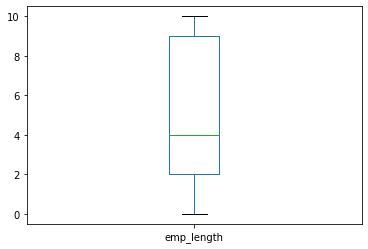

In [25]:
loans_eda.emp_length.plot.box()

In [172]:
loans_eda.emp_length.value_counts()

10.0    8483
0.0     4507
2.0     4290
3.0     4011
4.0     3342
5.0     3193
1.0     3167
6.0     2168
7.0     1710
8.0     1434
9.0     1225
Name: emp_length, dtype: int64

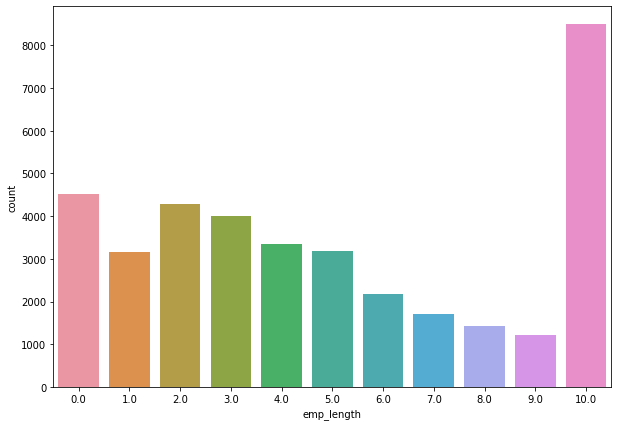

In [26]:
plt.figure(figsize=(10,7))
ax = sns.countplot(data=loans_eda,x='emp_length')

#### Understand main purpose for getting a loan

In [173]:
loans_eda.purpose.value_counts()

debt_consolidation    18048
credit_card            5026
other                  3863
home_improvement       2873
major_purchase         2148
small_business         1754
car                    1499
wedding                 926
medical                 681
moving                  576
vacation                375
house                   367
educational             325
renewable_energy        102
Name: purpose, dtype: int64

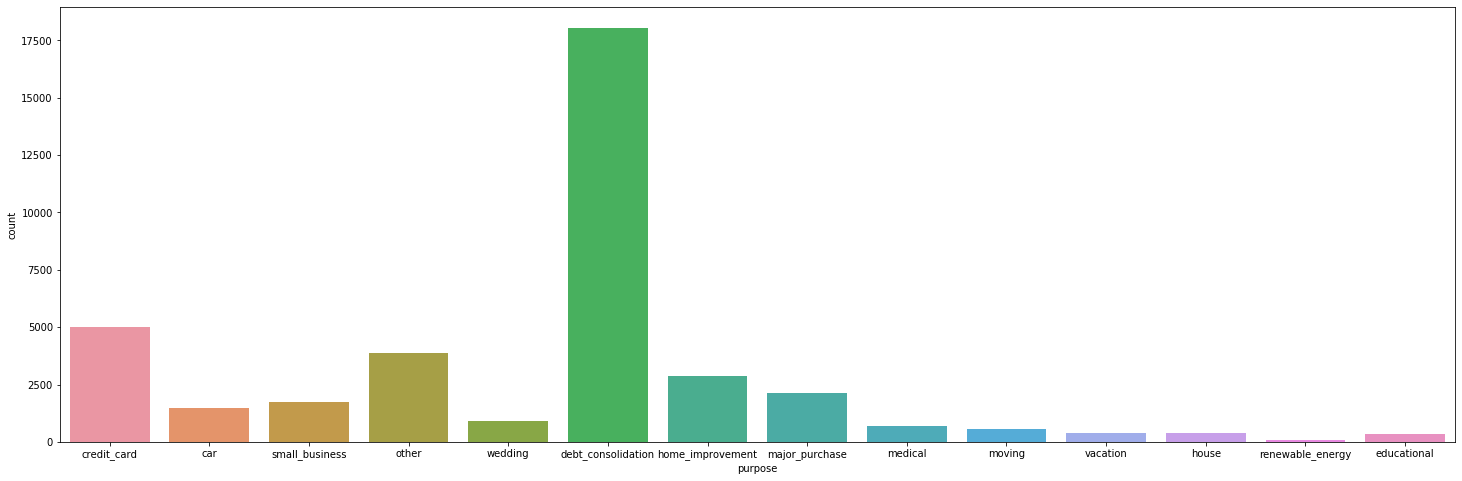

In [27]:
plt.figure(figsize=(25,8))
px = sns.countplot(data=loans_eda,x='purpose')

#### Understand what grade loans are mainly offered by Lending Club

In [176]:
loans_eda.grade.value_counts()

B    11674
A    10038
C     7829
D     5084
E     2663
F      976
G      299
Name: grade, dtype: int64

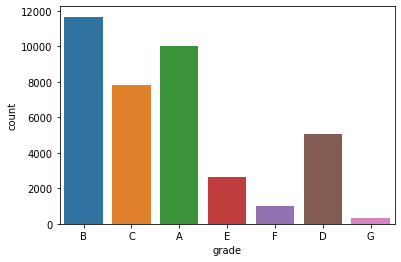

In [28]:
ax = sns.countplot(data=loans_eda,x='grade')

#### Check the annual income range

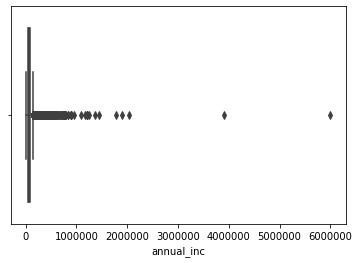

In [29]:
ax = sns.boxplot(data=loans_eda,x='annual_inc')

#### Understand Debt to Income ratio

In [175]:
loans_eda.dti.describe()

count    38563.000000
mean        13.276553
std          6.670335
min          0.000000
25%          8.140000
50%         13.370000
75%         18.560000
max         29.990000
Name: dti, dtype: float64

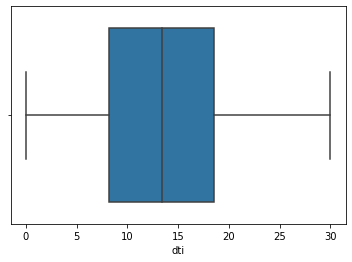

In [32]:
ax = sns.boxplot(data=loans_eda,x='dti')

#### Compare charged off loans to fully paid off loans

In [174]:
loans_eda.loan_status.value_counts()

Fully Paid     32937
Charged Off     5626
Name: loan_status, dtype: int64

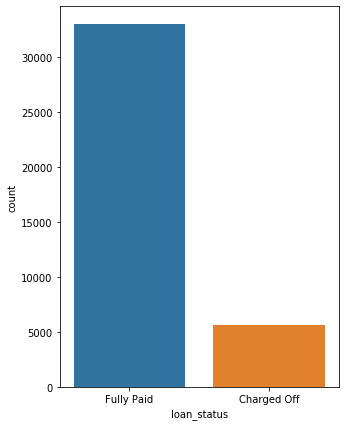

In [33]:
plt.figure(figsize=(5,7))
ax = sns.countplot(data=loans_eda,x='loan_status')

In [34]:
(loans_eda.Default_OrNot.sum()/len(loans_eda.Default_OrNot))

0.14589113917485672

<b>Approximately 14.6% of loans under consideration are Charged Off</b>

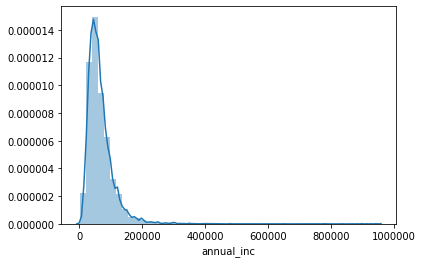

In [35]:
ax = sns.distplot(loans_eda.annual_inc)

### Bin the Annual Income

In [36]:
salary_labels_5 = ['VL', 'L', 'M', 'H', 'VH']
loans_eda['annual_inc_bins'] = pd.qcut(loans_eda['annual_inc'],
                              q=[0, .2, .4, .6, .8, 1],
                              labels=salary_labels_5)

In [187]:
loans_eda.annual_inc_bins.value_counts()

H     7929
L     7771
VL    7713
M     7679
VH    7471
Name: annual_inc_bins, dtype: int64

In [188]:
loans_eda.annual_inc.describe()

count     38563.000000
mean      68109.797129
std       47423.521494
min        4000.000000
25%       40000.000000
50%       58800.000000
75%       82000.000000
max      948000.000000
Name: annual_inc, dtype: float64

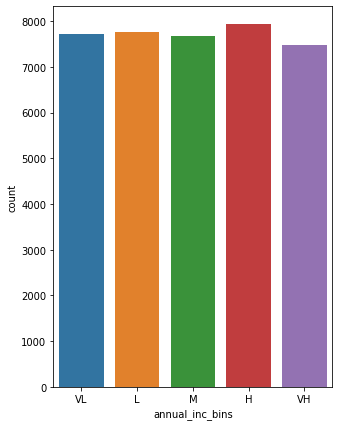

In [37]:
plt.figure(figsize=(5,7))
ax = sns.countplot(data=loans_eda,x='annual_inc_bins')

#### <b> Based on above it seems, annual income is evenly distributed for whole data set </b>

In [38]:
loans_eda.loan_amnt.describe()

count    38563.000000
mean     11047.201981
std       7348.603711
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

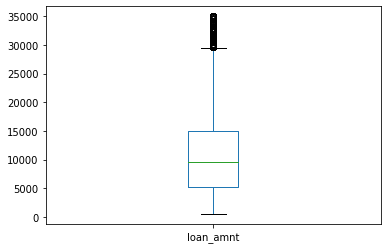

In [178]:
loans_eda.loan_amnt.plot.box()

In [39]:
loanamt_labels_5 = ['VL', 'L', 'M', 'H', 'VH']
loans_eda['loan_amnt_bins'] = pd.qcut(loans_eda['loan_amnt'],
                              q=[0, .2, .4, .6, .8, 1],
                              labels=loanamt_labels_5 )

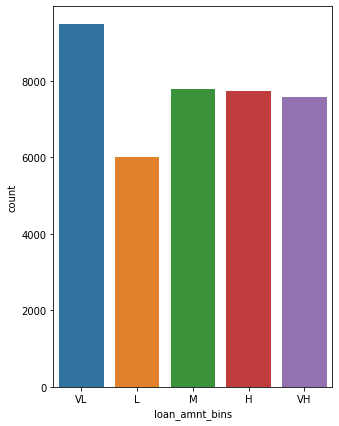

In [40]:
plt.figure(figsize=(5,7))
ax = sns.countplot(data=loans_eda,x='loan_amnt_bins')

In [177]:
loans_eda.loan_amnt_bins.value_counts()

VL    9469
M     7785
H     7736
VH    7577
L     5996
Name: loan_amnt_bins, dtype: int64

#### Loans with lowest amount are higher in number

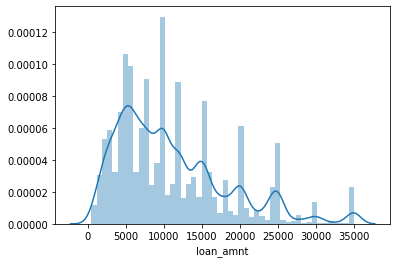

In [41]:
ax = sns.distplot(loans_eda.loan_amnt)

#### Loan amounts between 5k-10k are the highest

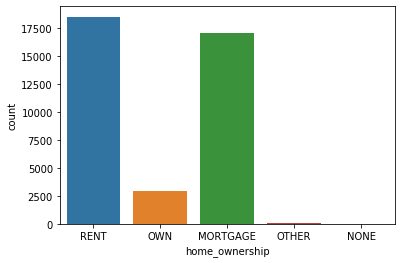

In [42]:
ax = sns.countplot(loans_eda.home_ownership)
#plt.annotate(x=loans_eda.home_ownership,y=loans_eda.home_ownership.value_counts())

In [180]:
loans_eda.home_ownership.value_counts()

RENT        18477
MORTGAGE    17011
OWN          2974
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

In [179]:
loans_eda.term.value_counts()

36    29087
60     9476
Name: term, dtype: int64

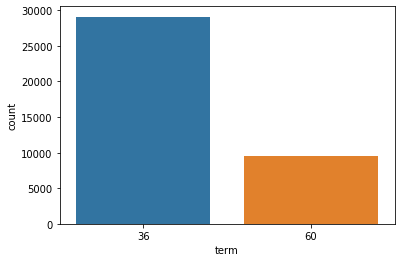

In [43]:
ax  = sns.countplot(loans_eda.term)

#### Loans with term 36 months are more than 60month term loans

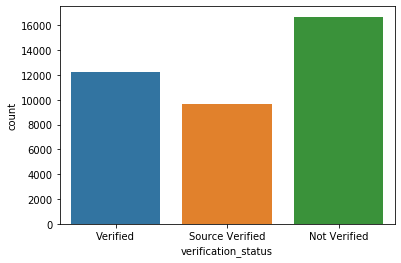

In [44]:
ax  = sns.countplot(loans_eda.verification_status)

In [181]:
loans_eda.verification_status.value_counts()

Not Verified       16687
Verified           12204
Source Verified     9672
Name: verification_status, dtype: int64

## Segmented Univariate analysis

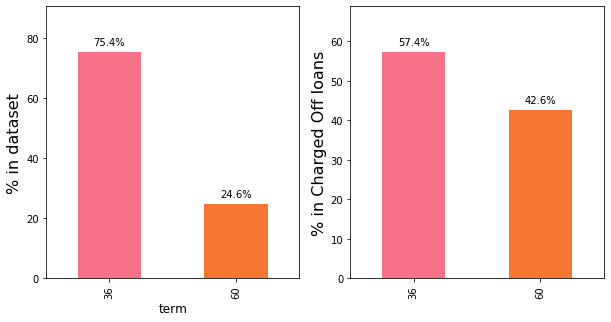

In [45]:
plt.figure(figsize=(10,5))
plot_percentages(loans_eda, 'term')

#### <b> Based on above, loans with 36 months are 13-15% more likely to be charged off </b>

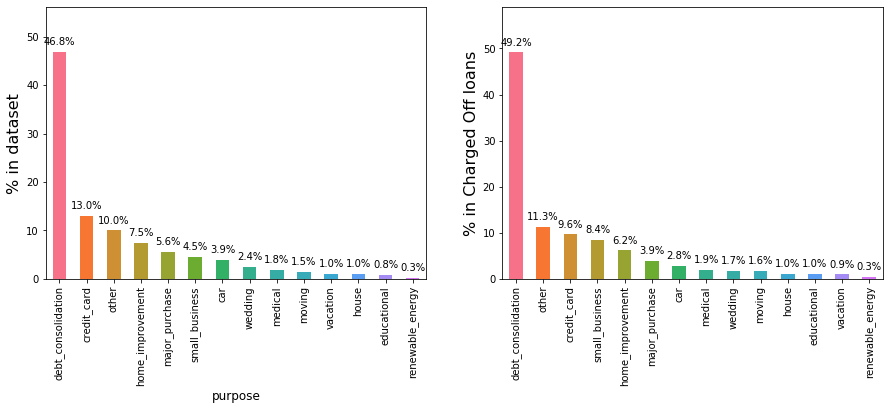

In [46]:
plt.figure(figsize=(15,5))
plot_percentages(loans_eda, 'purpose')

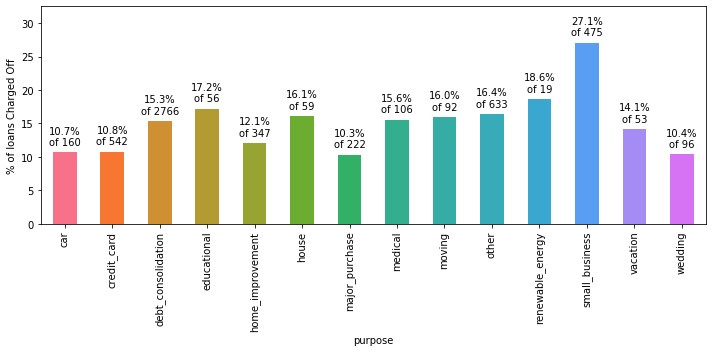

In [189]:
plt.figure(figsize=(10, 5))
plotLoanStatus(loans_eda, 'purpose')

#### Loans taken for small business have highest rate of default - 27.1%

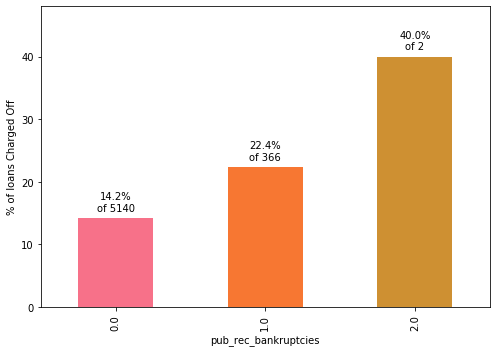

In [52]:
plt.figure(figsize=(7,5))
ax=plotLoanStatus(loans_eda, 'pub_rec_bankruptcies')

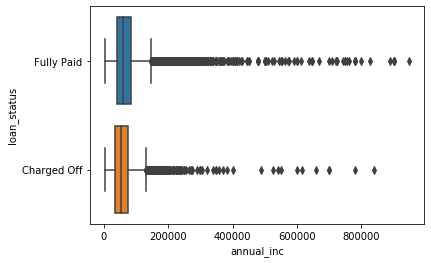

In [56]:
ax = sns.boxplot(x="annual_inc",y='loan_status',data=loans_eda)

#### Based on the boxplot for annual incomes for Fully Paid and Charged off loans have comparable rabge with medians closer

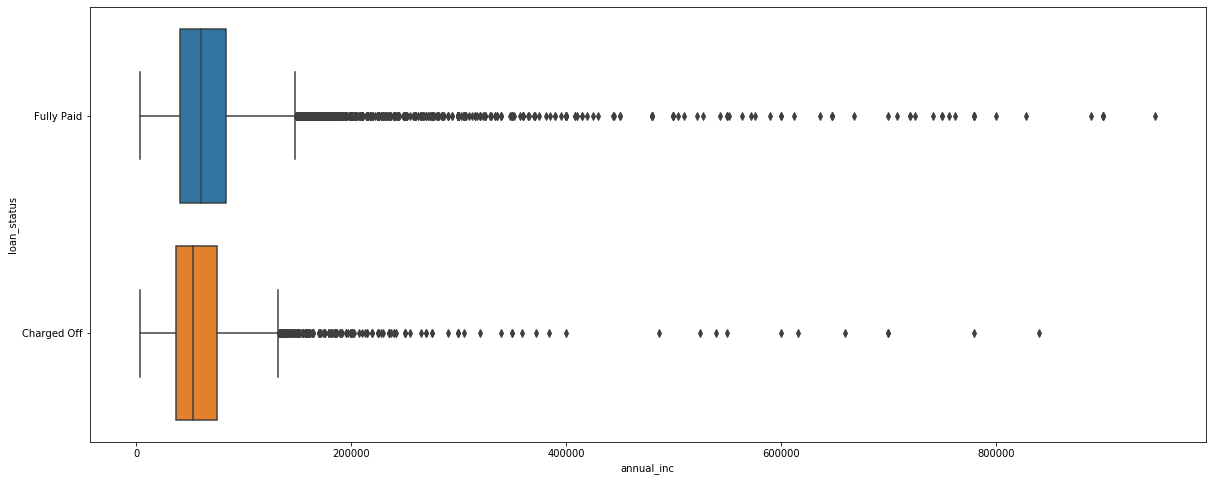

In [57]:
plt.figure(figsize=(20,8))
ax = sns.boxplot(x="annual_inc",y='loan_status',data=loans_eda)

#### However, customers who have fully paid loans have more median annual income than the customers with 'Charged off' loans

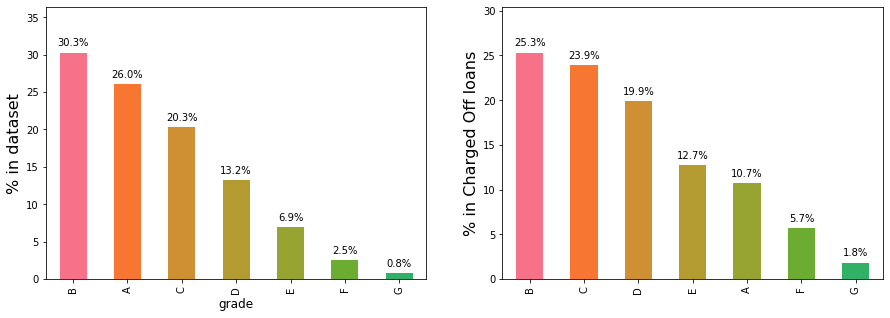

In [75]:
plt.figure(figsize=(15,5))
plot_percentages(loans_eda, 'grade')

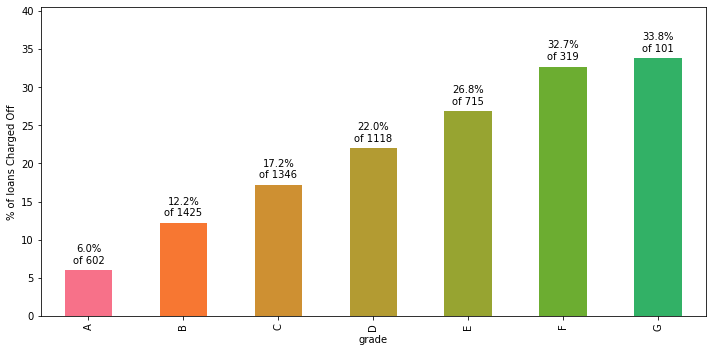

In [191]:
plt.figure(figsize=(10,5))
plotLoanStatus(loans_eda, 'grade')

#### Loans with Grade B & C are more likely to be charged off

In [83]:
loans_eda.groupby('loan_status').int_rate.describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5626.0,13.820579,3.654721,5.42,11.295,13.61,16.40,24.40
Fully Paid,32937.0,11.610406,3.599999,5.42,8.490,11.49,13.99,24.11


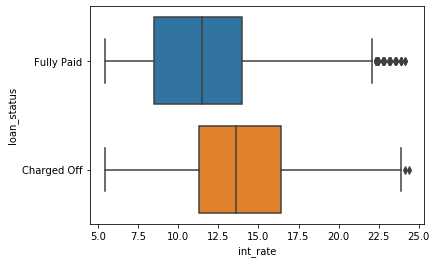

In [81]:
ax = sns.boxplot(data=loans_eda,x='int_rate',y='loan_status')

In [192]:
loans_eda['interest_rate_buckets'] = round(loans_eda['int_rate'])

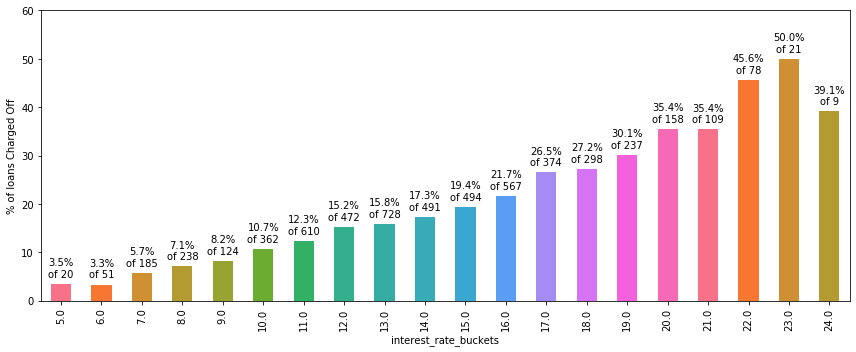

In [193]:
plt.figure(figsize=(12,5))
plotLoanStatus(loans_eda, 'interest_rate_buckets')

#### 50% of loans with 23% interest rate are most defaulted.

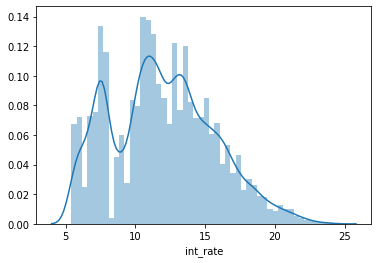

In [82]:
ax = sns.distplot(loans_eda.int_rate)

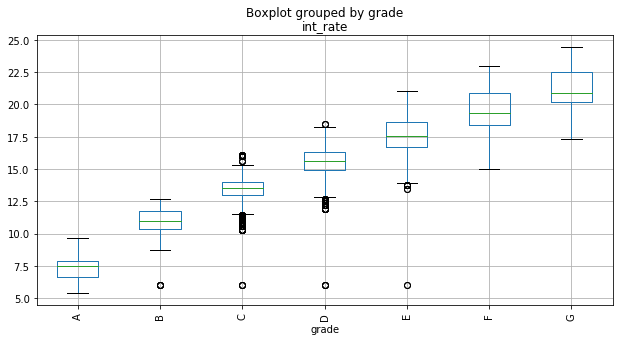

In [90]:
fig, ax = plt.subplots(figsize=(10,5))
loans_eda.boxplot(column=['int_rate'],by='grade', ax=ax, rot=90)

#### Loans with higher grade havd higher interest rates understandably. This is not a risk factor

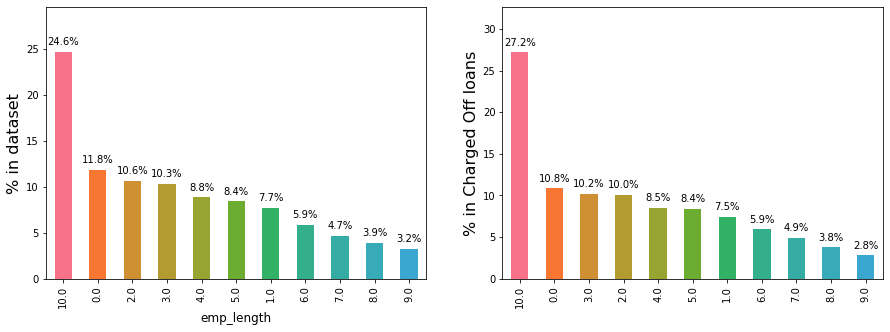

In [115]:
plt.figure(figsize=(15,5))
plot_percentages(loans_eda[(loans_eda['verification_status']=='Verified') | (loans_eda['verification_status']=='Source Verified')],'emp_length')

#### Number of customers with more than 10 years of experience are 24.6% in total loans and proportionately

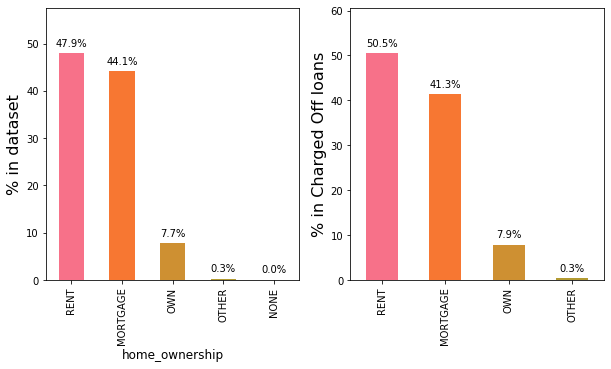

In [116]:
plt.figure(figsize=(10,5))
plot_percentages(loans_eda, 'home_ownership')

#### Home Owndership does not seem to be a driving factor for defaulting as not much change is seen in the charged off loans with respect to percentages

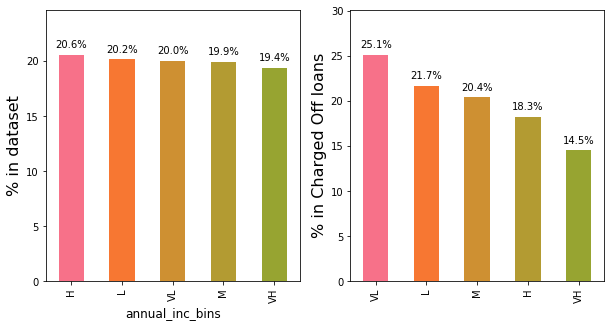

In [135]:
plt.figure(figsize=(10,5))
plot_percentages(loans_eda,'annual_inc_bins')

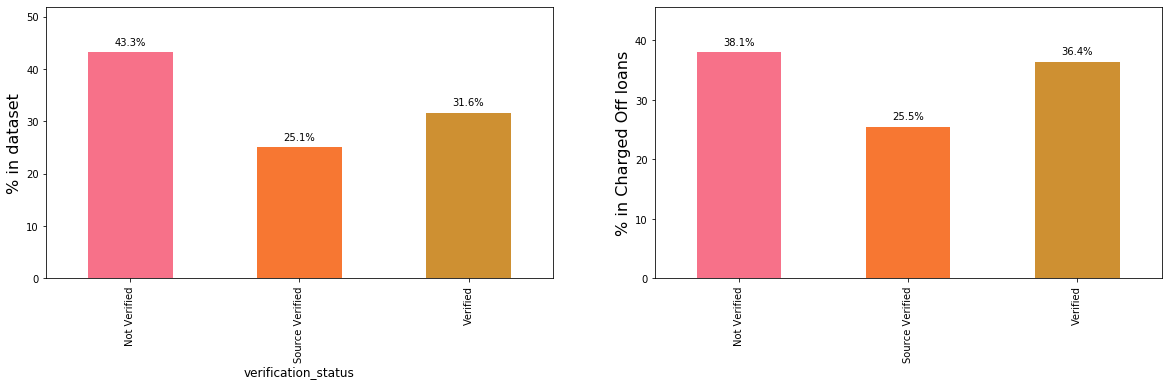

In [137]:
plt.figure(figsize=(20,5))
plot_percentages(loans_eda, 'verification_status', True)

#### %of Verified loans increases in 'Charged off' loans and this needs investigation

## Bivariate Analysis

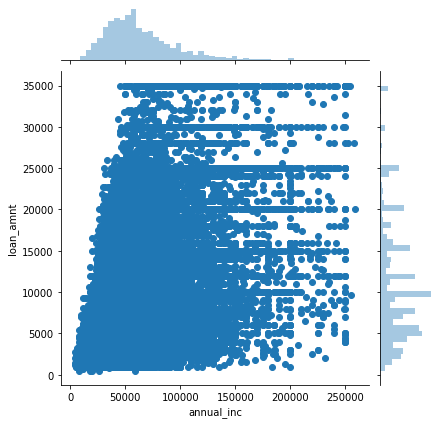

In [143]:
sns.jointplot('annual_inc', 'loan_amnt', loans_eda[loans_eda['annual_inc']<260000])
plt.show()

#### Some of the low income customers have been offered loans with higher loan amounts

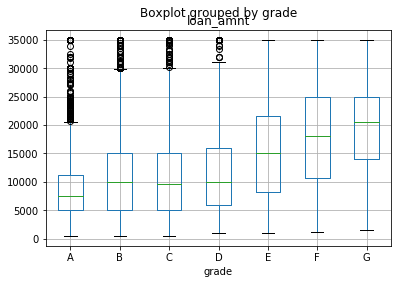

In [144]:
loans_eda.boxplot(column='loan_amnt', by='grade')
plt.show()

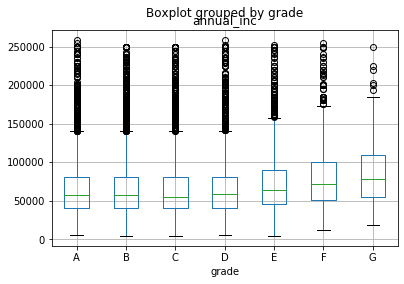

In [145]:
loans_eda.loc[loans_eda['annual_inc']<260000].boxplot(column='annual_inc', by='grade')
plt.show()

#### Customers with low annual income have been offered high grade loans

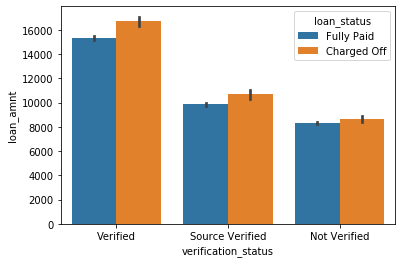

In [146]:
sns.barplot(x='verification_status', y='loan_amnt', hue="loan_status", data=loans_eda, estimator=np.mean)

#### Verified loans have high loan amounts and hence they seem to have higher loan amounts explaining why verified loans are more defaulted

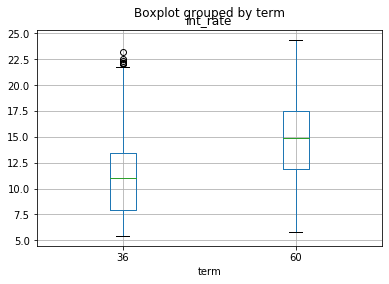

In [148]:
#master_loan.groupby('term').int_rate.mean().plot(kind='bar')
loans_eda.boxplot(column='int_rate', by='term')
plt.show()

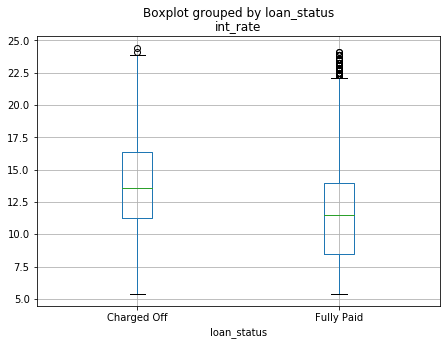

In [151]:
loans_eda.boxplot(column='int_rate', by='loan_status',figsize=(7,5))

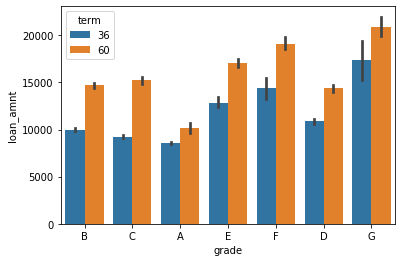

In [153]:
sns.barplot(x='grade', y='loan_amnt', hue="term", data=loans_eda, estimator=np.mean)
plt.show()

#### Higher Loan amounts are associated with lower grade and longer term

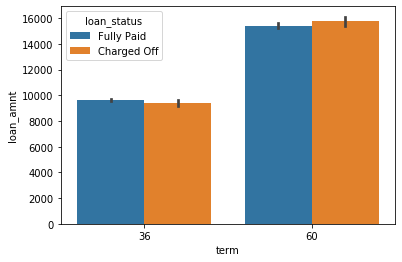

In [196]:
sns.barplot(x='term', y='loan_amnt', hue="loan_status", data=loans_eda, estimator=np.mean)
plt.show()

#### Longer term means higher Charge Offs

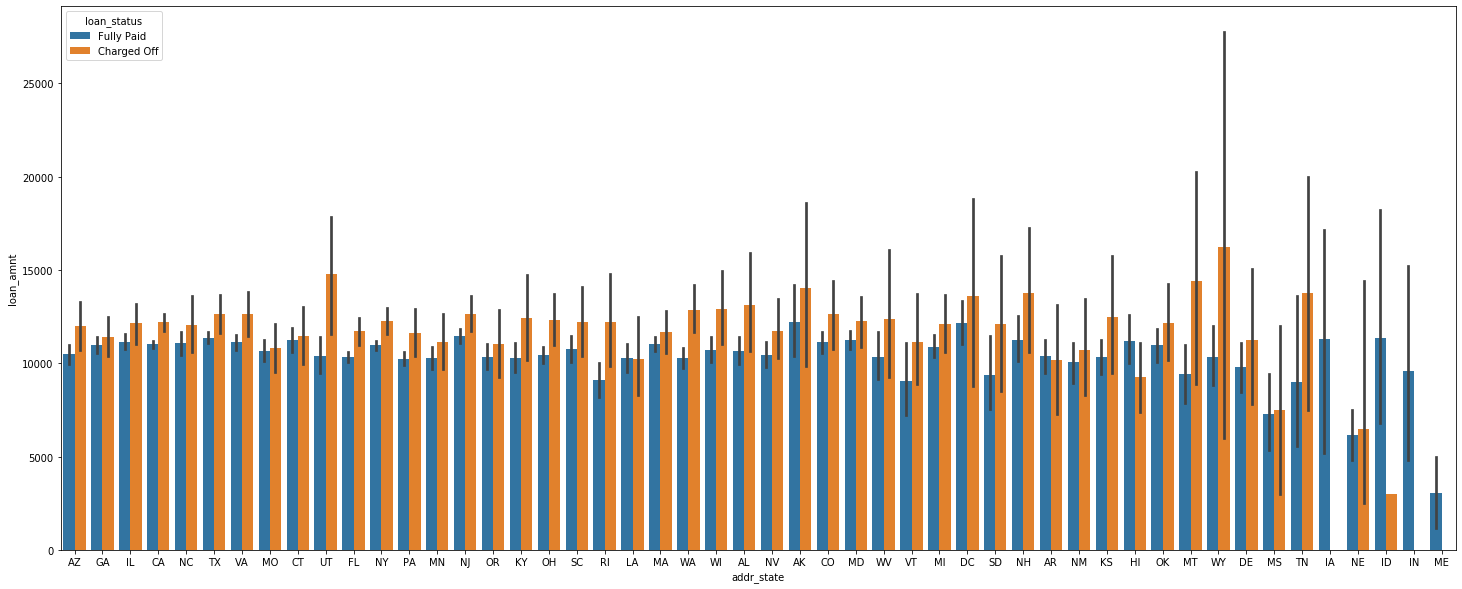

In [155]:
plt.figure(figsize=(25,10))
sns.barplot(x='addr_state', y='loan_amnt', hue='loan_status',data=loans_eda, estimator=np.mean)
plt.show()

### Wyoming has highest loan amount which was charged off. It needs further external investigation

In [158]:
corr=loans_eda.corr()

In [159]:
corr

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_amnt,pub_rec_bankruptcies,Default_OrNot,annual_in_bin,annual_inc_bin
id,1.000000,0.993534,0.120579,0.131226,0.231540,0.053801,0.076004,0.110340,0.016155,0.091432,0.110394,0.194779,0.092949,0.123218,-0.055834,0.142279,-0.008033,0.042266,0.016155,0.018469
member_id,0.993534,1.000000,0.120357,0.130251,0.241261,0.050684,0.070839,0.115103,0.016628,0.092583,0.111772,0.205141,0.093742,0.126608,-0.058539,0.142607,-0.007378,0.039680,0.016628,0.018819
loan_amnt,0.120579,0.120357,1.000000,0.981804,0.937949,0.301224,0.932298,0.149022,0.364988,0.062382,0.881893,0.847635,0.845848,0.728296,0.047106,0.474638,-0.035991,0.059421,0.364988,0.359822
funded_amnt,0.131226,0.130251,0.981804,1.000000,0.956169,0.304868,0.958043,0.148760,0.361591,0.062087,0.898688,0.864477,0.864054,0.736609,0.049463,0.478434,-0.037008,0.056439,0.361591,0.356168
funded_amnt_inv,0.231540,0.241261,0.937949,0.956169,1.000000,0.297414,0.905465,0.159967,0.345202,0.070533,0.874714,0.909107,0.838564,0.726700,0.029373,0.469137,-0.041207,0.037709,0.345202,0.340487
int_rate,0.053801,0.050684,0.301224,0.304868,0.297414,1.000000,0.277136,0.000379,0.070822,0.110688,0.290598,0.284869,0.174645,0.521210,0.094303,0.174326,0.083003,0.211356,0.070822,0.069569
installment,0.076004,0.070839,0.932298,0.958043,0.905465,0.277136,1.000000,0.122093,0.367232,0.051885,0.858494,0.817656,0.847753,0.642642,0.058376,0.413579,-0.033382,0.027110,0.367232,0.360959
emp_length,0.110340,0.115103,0.149022,0.148760,0.159967,0.000379,0.122093,1.000000,0.145036,0.050649,0.132054,0.142645,0.123742,0.116355,-0.017180,0.083953,0.062718,0.016246,0.145036,0.142070
annual_inc,0.016155,0.016628,0.364988,0.361591,0.345202,0.070822,0.367232,0.145036,1.000000,-0.140444,0.348217,0.334587,0.348843,0.251132,0.011866,0.195435,-0.018996,-0.051363,1.000000,0.971791
dti,0.091432,0.092583,0.062382,0.062087,0.070533,0.110688,0.051885,0.050649,-0.140444,1.000000,0.059249,0.066213,0.036735,0.103092,-0.011526,0.008576,0.005856,0.044778,-0.140444,-0.138924


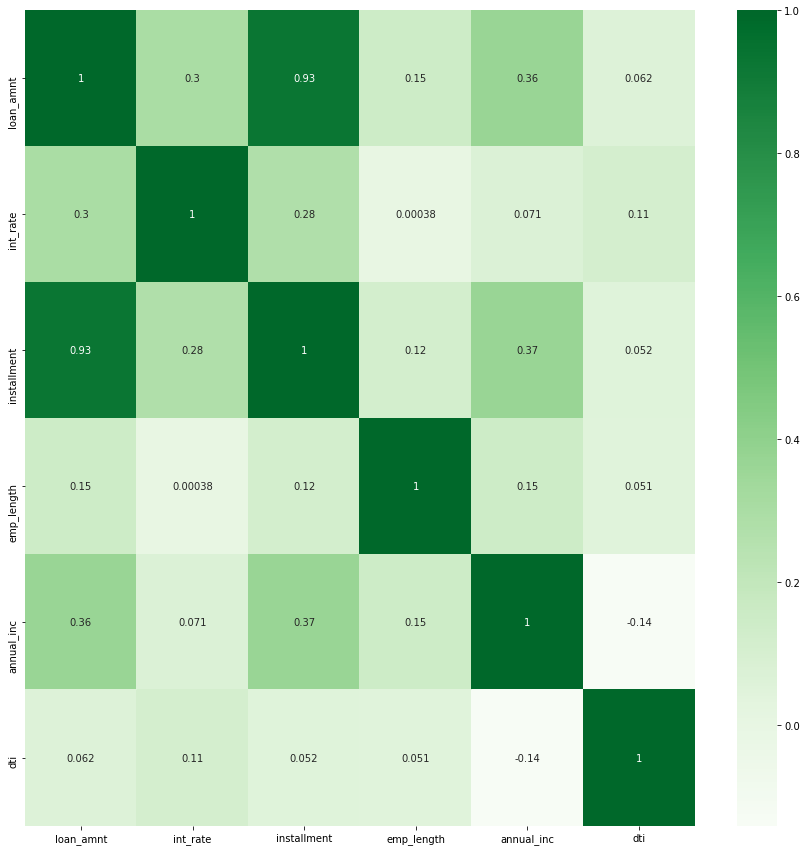

In [203]:
plt.figure(figsize=(15,15))
limit_vars= ['loan_amnt', 'int_rate', 'installment',
       'emp_length', 'annual_inc',
       'dti']
corr = loans_eda[limit_vars].corr()
sns.heatmap(corr, annot=True, center=0.5,cmap='Greens')